# Absenteeism Data set

In [5]:
#Load given Absenteeism data set into panda DataFrame
#Look a few records to get familiarized with the data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
df_original=pd.read_csv('./Absenteeism_at_work.csv',sep=';')
df_original.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


# Data Preprocessing

In [6]:
#Check all columns , their data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [7]:
# Change data types of boolean and category columns appropriately
df = df_original.copy()
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null bool
Education                          740 non-null category
Son                                740 non-null int64
Social drinker                     740 non-null bool
Social smoker                      740 non-null bool
Pet              

In [8]:
#Check for any missing values
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
#check for invalid data for e.g. Month of absence = 0
df[df['Month of absence']==0]
#Removing these records from dataframe
df = df[df['Month of absence'] != 0]
len(df)

737

In [10]:
len(df[df['Absenteeism time in hours']==0])

41

In [11]:
len(df[df['Disciplinary failure']==1])

40

In [12]:
# Since there is one record in disciplinary failure = 1 which has absenteeism time = 0.
df[(df['Absenteeism time in hours']==0) & (df['Disciplinary failure']!=1)]
# It looks like a valid record for employee id 34. We can replace absenteeism time with the mean value of same ID.

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,0


In [13]:
df[df['ID']==34][['Absenteeism time in hours']].mean()

Absenteeism time in hours    6.254545
dtype: float64

In [14]:
#Update this record with mean value of 6
df.loc[(df['ID']==34) & (df['Absenteeism time in hours']==0),'Absenteeism time in hours']=6
#Verify update
df[(df['ID']==34) & (df['Absenteeism time in hours']==6)]


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,6


In [15]:
len(df[df['Disciplinary failure']==1])

40

In [16]:
#Update Absenteeism in hours as 8 for all the rows with Disciplinary failure assuming in 
#such situations, employees were asked to be absent
df.loc[(df['Absenteeism time in hours']==0),'Absenteeism time in hours']=8
len(df[df['Absenteeism time in hours']==0])

0

In [17]:
#drop weight and height attributes since BMI is a derived attribute which has 
#information about both these attributes
df=df.drop(['Weight'],axis=1)
df=df.drop(['Height'],axis=1)

# Exploratory Data Analysis


7.394843962008141


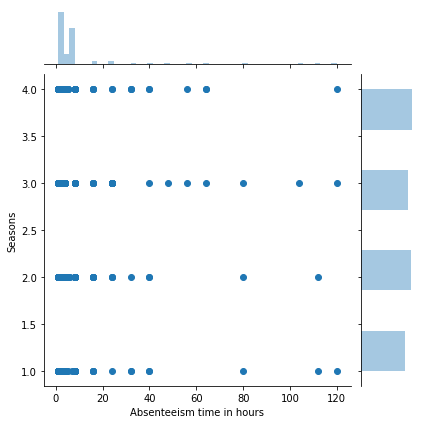

In [18]:
#Mean of absenteeism time by seasons
import seaborn as sns
print(df['Absenteeism time in hours'].mean())
sns.jointplot(x='Absenteeism time in hours',y='Seasons',data=df)

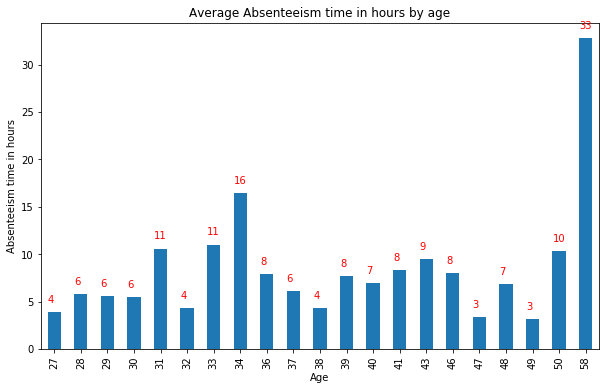

In [19]:
#Absenteeism time by Age
#sns.jointplot(x='Age', y='Absenteeism time in hours',data=df)
age_abs = df.groupby('Age')[['Absenteeism time in hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(10,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

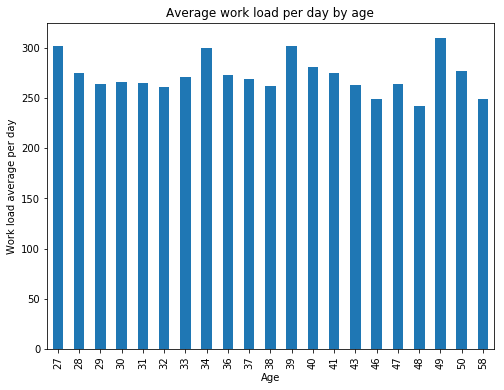

In [20]:
# Average work load per day by age
age_work_sum = df.groupby('Age', as_index=False)[['Work load Average/day ']].mean()
ax = age_work_sum.plot(kind='bar', x='Age', figsize=(8,6), legend=False)
ax.set_ylabel('Work load average per day')
ax.set_title('Average work load per day by age')
plt.show()

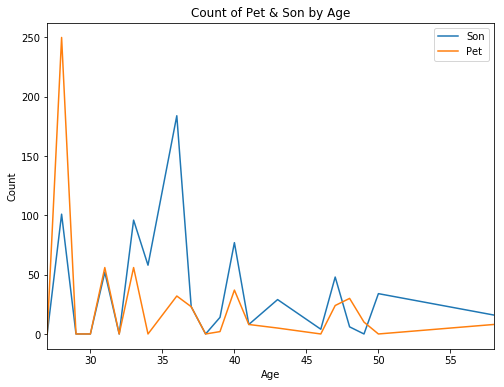

In [21]:
#Son and Pets by Age
ax = df.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()

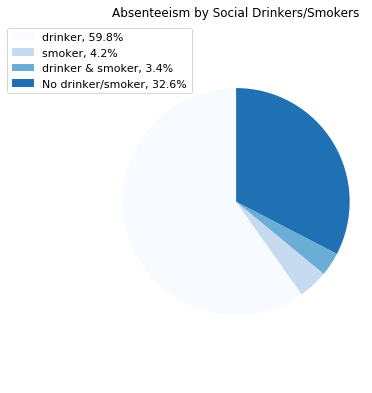

In [22]:
#Absenteeism by Social driking and Smoking
drink_sum = df[(df['Social drinker'] == 1) & (df['Social smoker']== 0)]['Absenteeism time in hours'].sum()
smok_sum = df[(df['Social drinker'] == 0) & (df['Social smoker']== 1)]['Absenteeism time in hours'].sum()
drink_smok_sum = df[(df['Social drinker'] == 1) & (df['Social smoker'] == 1)]['Absenteeism time in hours'].sum()
abs_sum = df[(df['Social drinker'] == 0) & (df['Social smoker'] == 0)]['Absenteeism time in hours'].sum()

absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('Blues')
ax1.set_prop_cycle("color", [theme(1. * i / len(absen))
                             for i in range(len(absen))])
 
_, _ = ax1.pie(absen, startangle=90, radius=1800)
 
ax1.axis('equal')

total = sum(absen)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(pie_labels, absen)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

ax1.set_title('Absenteeism by Social Drinkers/Smokers')
plt.show()


<Figure size 864x432 with 0 Axes>

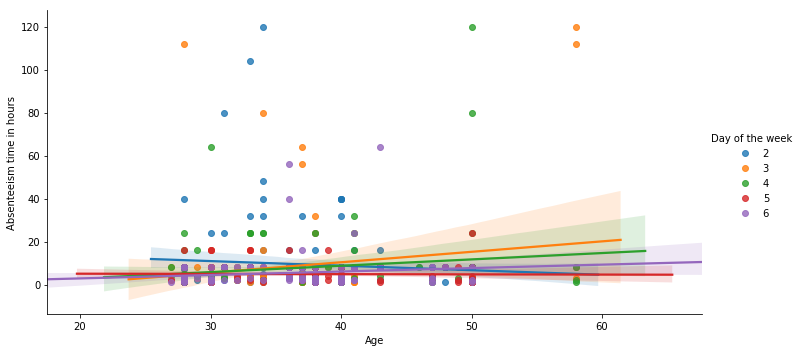

In [23]:
#Abesenteeism by day of the week
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week',height=5,aspect=2)

In [24]:
roa = df.groupby('Reason for absence')
roa['Absenteeism time in hours'].max()
# Reason 6,9,11,12,13,19 are highest reasons for absenteeism

Reason for absence
0       8
1      64
2      24
3       8
4       8
5       8
6     120
7      40
8       8
9     112
10     48
11    120
12    112
13    120
14     40
15      8
16      3
17      8
18     80
19    104
21      8
22     16
23     16
24      8
25      8
26     16
27      6
28     24
Name: Absenteeism time in hours, dtype: int64

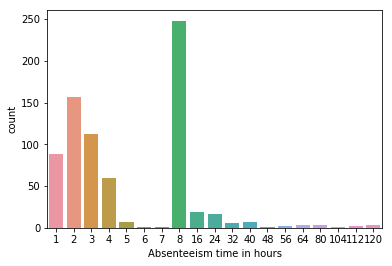

In [25]:
sns.countplot(x='Absenteeism time in hours',data=df)

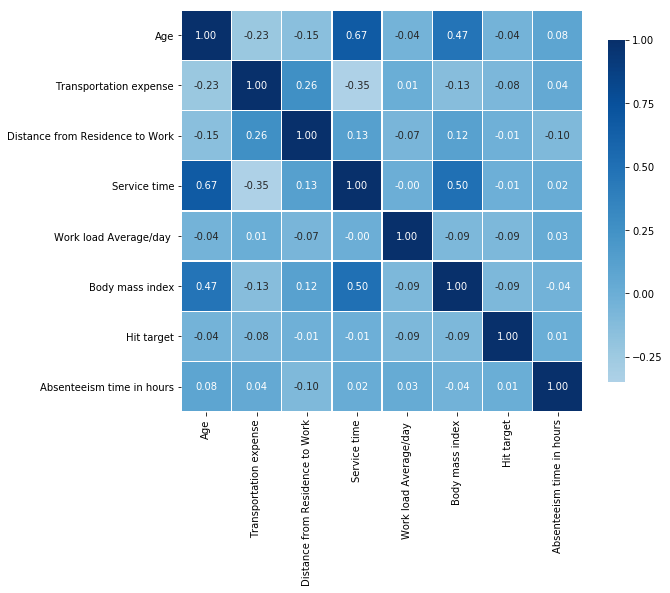

In [26]:
#Let's see how other columns are correlated to target variable Absenteeism hours in a heat map. 
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',cmap='Blues',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df[['Age','Education','Seasons','Transportation expense' ,'Month of absence','Distance from Residence to Work','Service time','Work load Average/day ','Body mass index','Hit target','Absenteeism time in hours']])

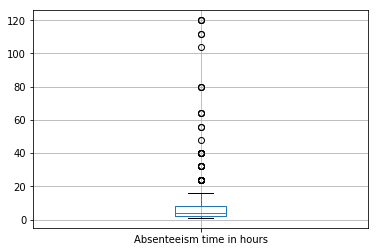

In [27]:
#box plot for absenteeism hours to show outliers
df.boxplot('Absenteeism time in hours')

# Regression models

In [28]:
#creating a function for printing r-2 score and RMSE
from sklearn.metrics import r2_score, mean_squared_error as MSE
import warnings
warnings.filterwarnings('ignore')
def R2ScoreRMSE(y_test,y_pred):
    test_score = r2_score(y_test, y_pred)
    rmse_test = MSE(y_test, y_pred) ** (1/2)
    print(f'Test R-2 score: {test_score:>5.3}')
    print(f'Test RMSE     : {rmse_test:.4f}')


In [29]:
#Since the problem statement asks to predict number of absenteeism hours, trying out regression model first
#We will build model using RandomForestRegressor and LinearRegression
#First we are using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
#following features are dropped:
#  1) ID    
#  2) Weight  --> BMI covers this feature
#  3) Height  --> BMI covers this feature
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 
                  'Transportation expense','Distance from Residence to Work', 'Service time', 
                  'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 
                  'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index' ]]
X = df_features
y = df['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)

#Accuracy score evaluation
R2ScoreRMSE(y_test,y_pred)

Test R-2 score: 0.125
Test RMSE     : 10.8969


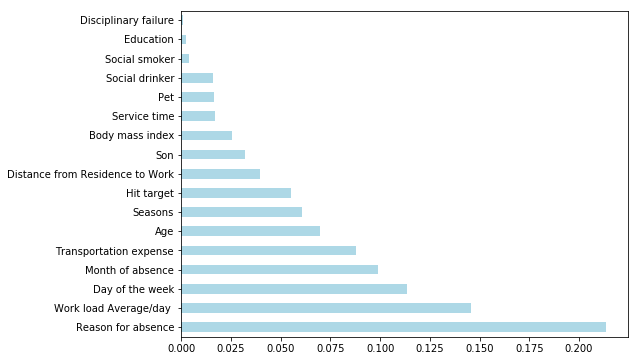

In [30]:
# RMSE score is too high and also R-2 score is very low.
#Let's check the importance of features in the model
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightblue'))
plt.show()

In [31]:
# LinearRegression Moddel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_features
y = df['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model =LinearRegression()
a = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Accuracy score evaluation
R2ScoreRMSE(y_test,y_pred)

Test R-2 score: 0.147
Test RMSE     : 10.7642


In [32]:
# LinearRegression Moddel
# if we exclude outlier absenteeism hours, we are able to improve the scores
# we have encoded categorical values using get_dummies. Total features increased to 75 because of this.
# We have scaled all the columns using StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# exclude rows having outliers
df_excluding_outliers = df_original[df_original['Absenteeism time in hours']<=24]

df_features_excluding_outliers = df_excluding_outliers[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 
                  'Transportation expense','Distance from Residence to Work', 'Service time', 
                  'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 
                  'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index' ]]

# encode categorical attributes
cols_to_transform = ['Reason for absence','Month of absence', 'Day of the week', 'Seasons','Education','Son','Pet' ]
df_features_excluding_outliers = pd.get_dummies(df_features_excluding_outliers, columns = cols_to_transform )

# scale all the attributes
X = df_features_excluding_outliers
autoscaler = StandardScaler()
X_scaled = autoscaler.fit_transform(X)


y = df_excluding_outliers['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
model =LinearRegression()
a = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Accuracy score evaluation
R2ScoreRMSE(y_test,y_pred)

Test R-2 score: 0.367
Test RMSE     : 3.3475


In [33]:
df_features_excluding_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 739
Data columns (total 75 columns):
Transportation expense             712 non-null int64
Distance from Residence to Work    712 non-null int64
Service time                       712 non-null int64
Age                                712 non-null int64
Work load Average/day              712 non-null float64
Hit target                         712 non-null int64
Disciplinary failure               712 non-null int64
Social drinker                     712 non-null int64
Social smoker                      712 non-null int64
Body mass index                    712 non-null int64
Reason for absence_0               712 non-null uint8
Reason for absence_1               712 non-null uint8
Reason for absence_2               712 non-null uint8
Reason for absence_3               712 non-null uint8
Reason for absence_4               712 non-null uint8
Reason for absence_5               712 non-null uint8
Reason for absence_6         

In [34]:
# Linear Regression Model with Feature reduction
# skipping some of the features by using Recursive Feature Elimination (RFE) 
# We tried with various number of features and found that with 38 features we get 
# best balance between good R-2 score with less number of features.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

X = df_features_excluding_outliers
autoscaler = StandardScaler()
X_scaled = autoscaler.fit_transform(X)
y = df_excluding_outliers['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

model = LinearRegression()
model = RFE(model, 38)
fit = model.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
y_pred = model.predict(X_test)

#Accuracy score evaluation
R2ScoreRMSE(y_test,y_pred)

Num Features: 38
Selected Features: [False False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Feature Ranking: [30 33 32 31 35 38  1 36 34 37  1 15 29 27 26 22 12 20 11 28 19  7 25 16
 10 21  8 24 18 13  9 17  3 23  6 14  5  4  1  1  1  1  1  1  1  1  1  1
  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1]
Test R-2 score: 0.127
Test RMSE     : 3.9322


# Classification Models

In [35]:
#Since we are not able to improve sores using Regression models,
#Let's convert the target variable to categorical variable to predict in classification model
#using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Creating 4 absenteeism hour classes:
# absent_class = 0: absent for upto 4 hours
# absent_class = 1: absent for more then 4 hours not exceeding 8 hours
# absent_class = 2: absent for more then 8 hours not exceeding 24 hours
# absent_class = 3: absent for more then 24 hours
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 
                  'Transportation expense','Distance from Residence to Work', 'Service time', 
                  'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 
                  'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index' ]]

aba=[]
for i in df['Absenteeism time in hours']:
    if i <= 4:
        aba.append(0)
    elif i <= 8:
        aba.append(1)
    elif i<=24:
        aba.append(2)
    else:
        aba.append(3)
df['absent_class']=aba

X = df_features
y = df['absent_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7387387387387387


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.68      0.62      0.64        78
           2       0.25      0.11      0.15         9
           3       0.40      0.40      0.40         5

   micro avg       0.74      0.74      0.74       222
   macro avg       0.53      0.50      0.51       222
weighted avg       0.72      0.74      0.73       222



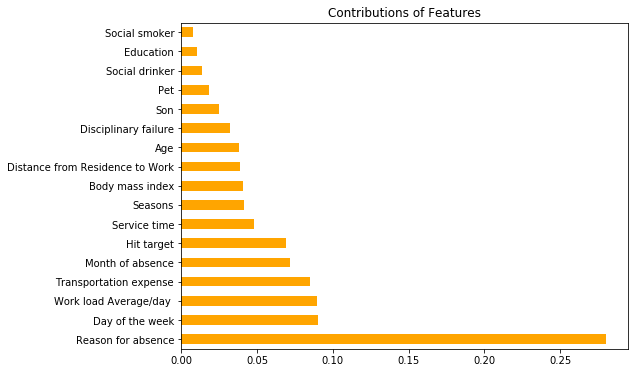

In [37]:
#Contributions of features in the above model
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='orange'))
plt.title('Contributions of Features')
plt.show()

In [38]:
#Using  Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6126126126126126


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       130
           1       1.00      0.17      0.29        78
           2       0.17      0.33      0.22         9
           3       0.09      0.40      0.15         5

   micro avg       0.61      0.61      0.61       222
   macro avg       0.49      0.45      0.36       222
weighted avg       0.77      0.61      0.57       222



In [41]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702702702702703


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       130
           1       0.65      0.82      0.72        78
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         5

   micro avg       0.77      0.77      0.77       222
   macro avg       0.38      0.41      0.39       222
weighted avg       0.74      0.77      0.75       222

